In [1]:
import pandas as pd
import numpy as np

In [2]:
LV_df = pd.read_csv('LV_df.csv')

/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,6,17,18,32,34,36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(LV_df)

1325315

In [4]:
LV_df_open = LV_df[LV_df.is_open == 1]

In [5]:
LV_df_open = LV_df_open.rename(columns={'cool_x':'cool_review','funny_x':'funny_review','stars_x':'stars_rev',
                                        'type_x':'type_review','useful_x':'useful_review',
                                        'name_x': 'name_biz', 'review_count_x': 'review_count_biz',
                                        'stars_y':'stars_biz', 'type_y':'type_biz','cool_y':'cool_usr',
                                        'funny_y':'funny_usr','name_y':'name_usr',
                                        'review_count_y':'review_count_usr','useful_y':'useful_usr'})

In [6]:
LV_df_open.columns.values

array(['Unnamed: 0', 'business_id', 'cool_review', 'date', 'funny_review',
       'review_id', 'stars_rev', 'text', 'type_review', 'useful_review',
       'user_id', 'address', 'attributes', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name_biz', 'neighborhood',
       'postal_code', 'review_count_biz', 'stars_biz', 'state', 'type_biz',
       'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer',
       'cool_usr', 'elite', 'fans', 'friends', 'funny_usr', 'name_usr',
       'review_count_usr', 'type', 'useful_usr', 'yelping_since'], dtype=object)

In [7]:
LV_df_BYuser = LV_df_open.groupby('user_id',as_index=False).count()

In [8]:
LV_df_BYitem = LV_df_open.groupby('business_id',as_index=False).count()

In [9]:
len(LV_df_BYitem)

20342

In [10]:
len(LV_df_BYuser)

388608

In [11]:
print "mean # of ratings each user generated:", LV_df_BYuser.business_id.mean()
print "median # of ratings each user generated:", np.median(LV_df_BYuser.business_id)

mean # of ratings each user generated: 3.0384577775
median # of ratings each user generated: 1.0


In [12]:
print "mean # of reviews each business received:", LV_df_BYitem.user_id.mean()
print "median # of reviews each business received:", np.median(LV_df_BYitem.user_id)

mean # of reviews each business received: 58.0458656966
median # of reviews each business received: 12.0


In [13]:
max(LV_df_BYitem.user_id)

6414

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [15]:
bins = np.arange(LV_df_BYuser.business_id.min(), LV_df_BYuser.business_id.max(), 20)

224846


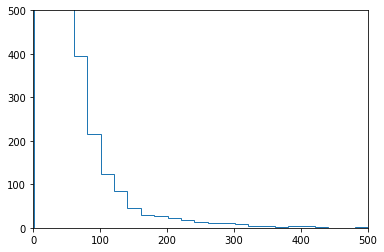

In [16]:
plt.hist(LV_df_BYuser.business_id,
         bins=bins,
        histtype = "step")

plt.ylim([0, 500])
plt.xlim([0,500])
print len(LV_df_BYuser[LV_df_BYuser.business_id==1])

In [17]:
len(LV_df_BYuser[LV_df_BYuser.business_id < 5])

337216

In [18]:
len(LV_df_BYuser)

388608

In [19]:
len(LV_df_BYuser[LV_df_BYuser.business_id <= 2])/(len(LV_df_BYuser)*1.0)

0.7425220273386034

In [20]:
#LV_reviewers_to_drop = LV_df_BYuser[LV_df_BYuser.business_id <= 2]
#LV_df_open_trim = LV_df_open[LV_df_open.user_id.sort_values(axis=0) != LV_reviewers_to_drop.user_id.sort(axis=0)]

In [21]:
len(LV_df_open)

1180769

In [22]:
LV_df_open[LV_df_open.user_id=="--0WZ5gklOfbUIodJuKfaQ"]

,Unnamed: 0,business_id,cool_review,date,funny_review,review_id,stars_rev,text,type_review,useful_review,...,cool_usr,elite,fans,friends,funny_usr,name_usr,review_count_usr,type,useful_usr,yelping_since
1264631,4003955,R0iz7n80-mDo2_uL_Q5ANg,0,2016-08-26,0,kIJMQvmsOwyK95ScIFFJqA,5,This is am AWESOME place to get some good beer...,review,0.0,...,0,[u'None'],0,"[u'MbOHurW2euzdQQI3uYyF0Q', u'-SSqwv9wwEIq5iWj...",0.0,Scott,7.0,user,0.0,2013-02-19


In [23]:
len(LV_df_BYuser[LV_df_BYuser.business_id == 1])

224846

In [24]:
def fix_categories(x):
    x = str(x)
    x = x.replace('[', '').replace(']', '').replace(',', '').split("u'")
    x = map(lambda y: y.replace("'", ""), x)
    x = map(lambda y: y.replace('u"', "").replace('"', "").strip(), x)
    if filter(None, x) != None: 
        return filter(None, x)
    else:
        return x

LV_df_open['categories'] = map(fix_categories, LV_df_open['categories'])

In [25]:
def get_big_cat(z):
    catlist = ['Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Education', 'Event Planning & Services', 'Financial Services', 'Food', 'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor', 'Local Services',  'Nightlife', 'Pets', 'Professional Services', 'Public Services & Government', 'Real Estate', 'Religious Organizations', 'Restaurants', 'Shopping']
    return filter(lambda x: x in catlist, z)
LV_df_open['big_cat'] = map(get_big_cat, LV_df_open['categories'])

In [26]:
catlist = ['Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Education', 'Event Planning & Services', 'Financial Services', 'Food', 'Home Services', 'Health & Medical', 'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services', 'Public Services & Government', 'Real Estate', 'Religious Organizations', 'Restaurants', 'Shopping']
rmlist = ['Automotive', 'Education', 'Financial Services',  'Health & Medical', 'Mass Media', 'Home Services', 'Local Services', 'Pets', 'Professional Services', 'Public Services & Government', 'Real Estate', 'Religious Organizations']
new_list = ['Active Life', 'Arts & Entertainment', 'Beauty & Spas', 'Event Planning & Services', 'Food', 'Hotels & Travel', 'Local Flavor', 'Nightlife', 'Restaurants', 'Shopping']
print len(sorted((rmlist) + (new_list)))
print len(sorted(catlist))

22
22


In [27]:
def get_excluder(z):
    rmlist = ['Automotive', 'Education', 'Financial Services', 'Mass Media', 'Home Services', 'Local Services', 'Pets', 'Professional Services', 'Public Services & Government', 'Real Estate', 'Religious Organizations']
    for i in rmlist:
        if i in z:
            return 1
    return 0

LV_df_open['rm'] = map(get_excluder, LV_df_open['big_cat'])

In [28]:
active_df = LV_df_open[map(lambda x: 'Active Life' in x, LV_df_open['big_cat'])]
arts_df = LV_df_open[map(lambda x: 'Arts & Entertainment' in x, LV_df_open['big_cat'])]
beauty_df = LV_df_open[map(lambda x: 'Beauty & Spas' in x, LV_df_open['big_cat'])]
events_df = LV_df_open[map(lambda x: 'Event Planning & Services' in x, LV_df_open['big_cat'])]
food_df = LV_df_open[map(lambda x: 'Food' in x, LV_df_open['big_cat'])]
hotels_df = LV_df_open[map(lambda x: 'Hotels & Travel' in x, LV_df_open['big_cat'])]
local_df = LV_df_open[map(lambda x: 'Local Flavor' in x, LV_df_open['big_cat'])]
nightlife_df = LV_df_open[map(lambda x: 'Nightlife' in x, LV_df_open['big_cat'])]
restaurant_df = LV_df_open[map(lambda x: 'Restaurants' in x, LV_df_open['big_cat'])]
shops_df = LV_df_open[map(lambda x: 'Shopping' in x, LV_df_open['big_cat'])]

In [29]:
len(active_df)+len(arts_df)+len(beauty_df)+len(events_df)+len(food_df)+len(hotels_df)+len(local_df)+len(nightlife_df)+len(restaurant_df)+len(shops_df)

1674459

In [ ]:
# active_df.to_csv('active_df.csv')
# arts_df.to_csv('arts_df.csv')
# beauty_df.to_csv('beauty_df.csv')
# events_df.to_csv('events_df.csv')
# food_df.to_csv('food_df.csv')
# hotels_df.to_csv('hotels_df.csv')
# local_df.to_csv('local_df.csv')
# nightlife_df.to_csv('nightlife_df.csv')
# restaurant_df.to_csv('restaurant_df.csv')
# shops_df.to_csv('shops_df.csv')

In [87]:
# Let's create a function that collect the reviews of our common reviewers
def get_biz_reviews(biz, common_reviewers):
    mask = (restaurant_df.user_id.isin(common_reviewers)) & (restaurant_df.business_id==biz)
    reviews = restaurant_df[mask].sort_values('user_id')
    reviews = reviews[reviews.user_id.duplicated()==False]
    return reviews

In [ ]:
def common_reviewers(biz1,biz2):
    biz_1_reviewers = restaurant_df[restaurant_df.business_id == biz1].user_id
    biz_2_reviewers = restaurant_df[restaurant_df.business_id == biz2].user_id
    common_reviewers = pd.Series(list(set(biz_1_reviewers).intersection(set(biz_2_reviewers))))
    if 

In [88]:
# Importing the scipy library to measure the pearson correlation coefficient
from scipy.stats.stats import pearsonr
def calculate_correlation(biz1, biz2):
    # We start by finding the common reviewers
    biz_1_reviewers = restaurant_df[restaurant_df.business_id == biz1].user_id
    biz_2_reviewers = restaurant_df[restaurant_df.business_id == biz2].user_id
    common_reviewers = pd.Series(list(set(biz_1_reviewers).intersection(set(biz_2_reviewers))))

    # Then we look for the reviews given by common reviewers
    biz_1_reviews = get_biz_reviews(biz1, common_reviewers)
    biz_2_reviews = get_biz_reviews(biz2, common_reviewers)
    
    # Calculate the Pearson Correlation Score
    return pearsonr(biz_1_reviews.stars_rev.apply(int), biz_2_reviews.stars_rev.apply(int))[0]

In [90]:
most_reviewed_biz = pd.DataFrame({'count' : restaurant_df.groupby(["business_id"]).size()})\
                                    .reset_index().sort_values(['count'],ascending = False)

In [98]:
len(most_reviewed_biz)

4093

In [101]:
# Getting the list of the most reviewed biz

top_biz = []

for i in most_reviewed_biz.business_id:
    top_biz.append(i)

    
# calculate the correlation for our top biz
correlation_coefficient = []

for biz1 in top_biz:
    #print "Calculating the correlations for:", biz1
    for biz2 in top_biz:
        if biz1 != biz2:
            row = [biz1, biz2] + [calculate_correlation(biz1, biz2)]
            correlation_coefficient.append(row)

/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/stats.py:3024: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/stats.py:3025: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/Users/apple/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in true_divide
  r = r_num / r_den


KeyboardInterrupt: 

In [ ]:
cols = ["biz_1", "biz_2", "Correlation"]
correlation_coefficient = pd.DataFrame(correlation_coefficient, columns=cols).sort_values('Correlation')

In [97]:
correlation_coefficient

,biz_1,biz_2,Correlation
89,f9sU31meK0bqAD7922sCog,oXoVJ0xKv82cBo9U6oEjlQ,-0.686050
80,oXoVJ0xKv82cBo9U6oEjlQ,f9sU31meK0bqAD7922sCog,-0.686050
52,LwQB9H3jZ9wTk24Lr-AnZQ,oXoVJ0xKv82cBo9U6oEjlQ,-0.504184
77,oXoVJ0xKv82cBo9U6oEjlQ,LwQB9H3jZ9wTk24Lr-AnZQ,-0.504184
32,Jt28TYWanzKrJYYr0Tf1MQ,YuiM5VKscO8rS1EX7f19_g,-0.500000
57,YuiM5VKscO8rS1EX7f19_g,Jt28TYWanzKrJYYr0Tf1MQ,-0.500000
61,YuiM5VKscO8rS1EX7f19_g,oXoVJ0xKv82cBo9U6oEjlQ,-0.324443
78,oXoVJ0xKv82cBo9U6oEjlQ,YuiM5VKscO8rS1EX7f19_g,-0.324443
2,fHM09_y3QX3n4a_bIFbk_w,Jt28TYWanzKrJYYr0Tf1MQ,-0.280671
27,Jt28TYWanzKrJYYr0Tf1MQ,fHM09_y3QX3n4a_bIFbk_w,-0.280671


In [ ]:
import csv
with open("/Users/apple/Desktop/capstone/model/pred_restaurant_pearsonr.csv", 'w') as csvfile:
    fieldnames = ['biz1','biz2', 'Correlation']
    writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
    writer.writeheader()
    top_biz = []
    for i in most_reviewed_biz.business_id:
        top_biz.append(i)
    for biz1 in top_biz:
    #print "Calculating the correlations for:", biz1
        for biz2 in top_biz:
            if biz1 != biz2:
                writer.writerow({'biz1':biz1,'biz2':biz2,'Correlation':calculate_correlation(biz1, biz2)})

In [ ]:
print 1